In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB


In [138]:
data = pd.read_csv('/data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [140]:
data.shape

(569, 33)

In [141]:
data.isna().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [142]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


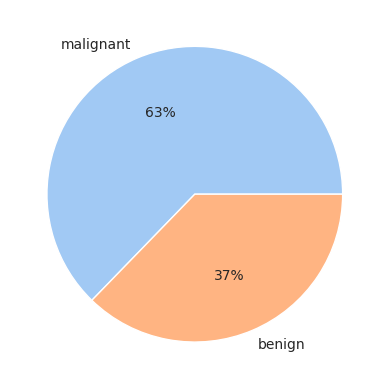

In [143]:
labels = ['malignant', 'benign']
colors = sns.color_palette('pastel')[0:5]
plt.pie(data['diagnosis'].value_counts(), labels=labels, colors=colors, autopct='%.0f%%')
plt.show()

In [144]:
print(data['diagnosis'].dtype)
print(data['diagnosis'].isnull().sum())
print(data['diagnosis'].unique())

object
0
['M' 'B']


In [145]:
data['diagnosis'] = LabelEncoder().fit_transform(data['diagnosis'])

In [146]:
print(data['diagnosis'].dtype)
print(data['diagnosis'].isnull().sum())
print(data['diagnosis'].unique())

int64
0
[1 0]


In [147]:
data['diagnosis']

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


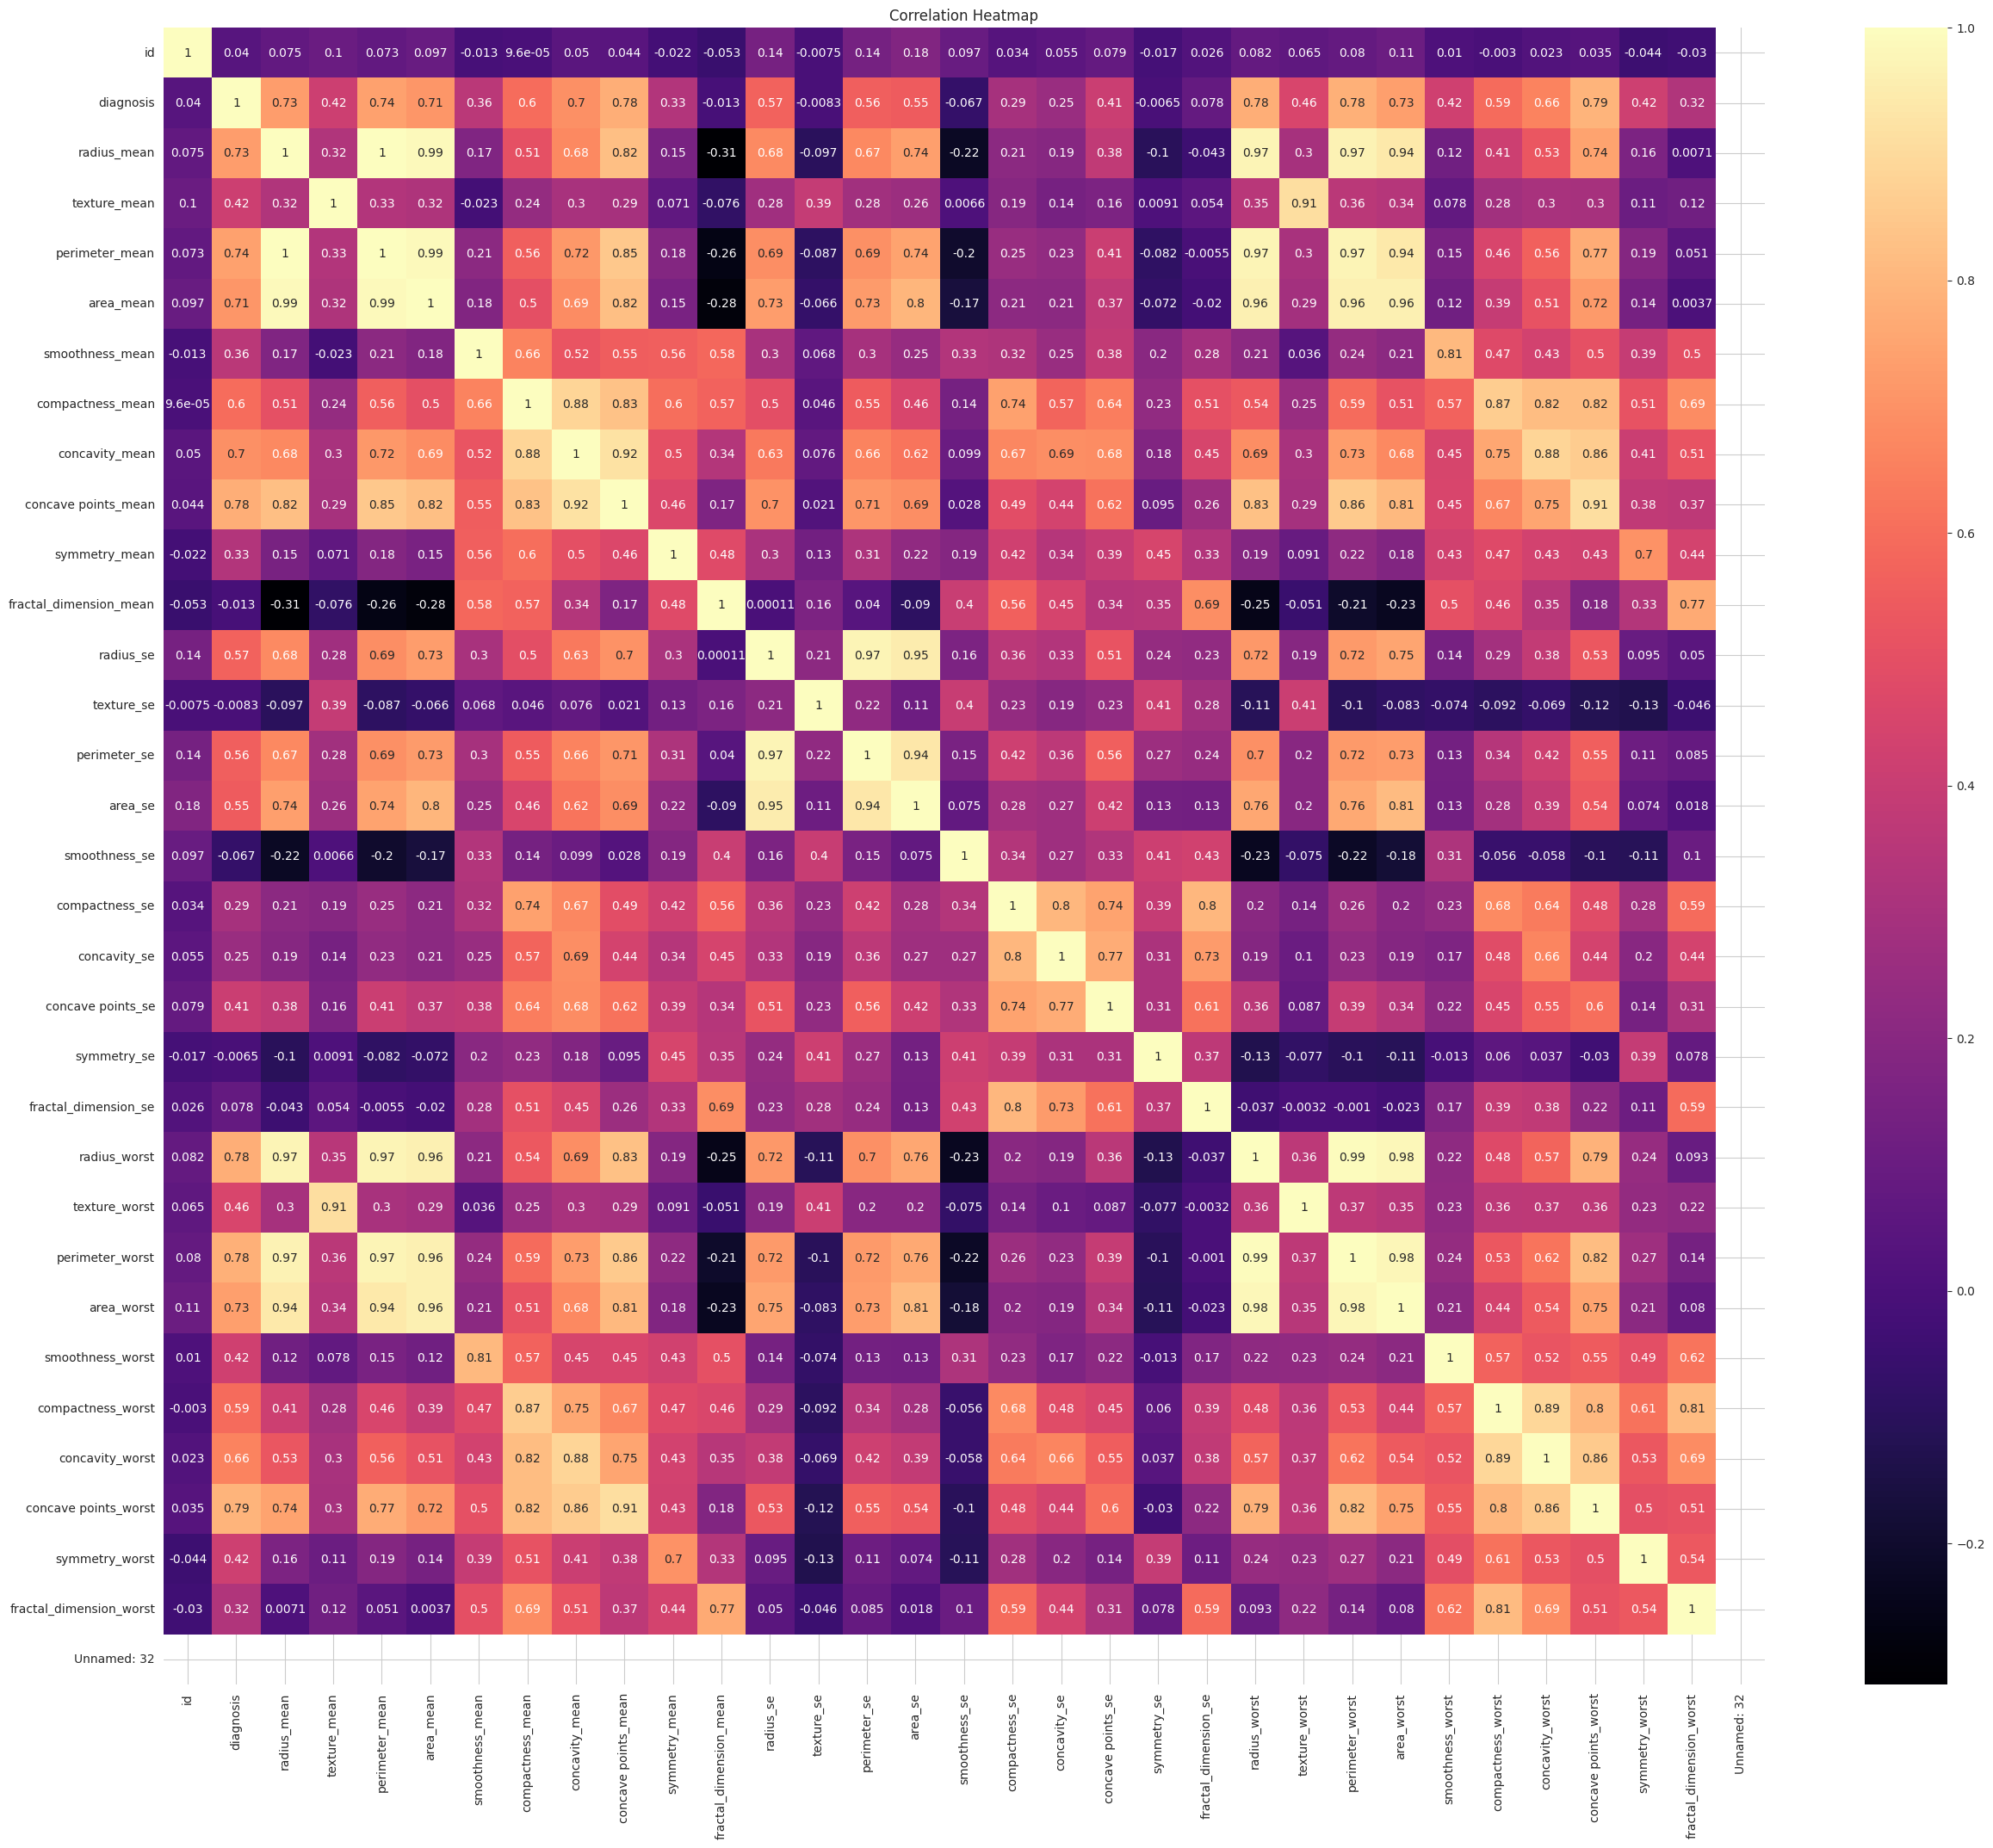

In [148]:
plt.figure(figsize=(30, 25))
sns.heatmap(data.corr(), annot=True, cmap='magma')
plt.title('Correlation Heatmap')
plt.show()

In [149]:
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

In [150]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [151]:
from sklearn.impute import SimpleImputer # Import SimpleImputer


In [152]:
imputer = SimpleImputer(strategy='mean') # Create an imputer instance

# Fit the imputer on the training data and transform both training and testing data
x_train_imputed = imputer.fit_transform(x_train) # Fit and transform on training data
x_test_imputed = imputer.transform(x_test) # Transform testing data

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [153]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_imputed) # Use imputed data for scaling
x_test_scaled = scaler.transform(x_test_imputed) # Use i

In [154]:
nb_classifier = GaussianNB()
nb_classifier.fit(x_train_scaled, y_train)

GaussianNB()

In [155]:
y_pred_nb_train = nb_classifier.predict(x_train_scaled)

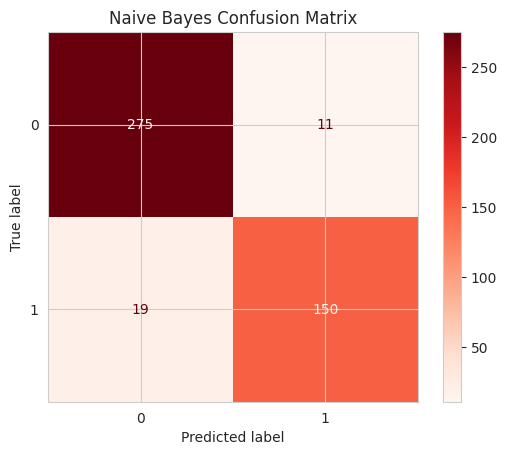

In [156]:
cm = confusion_matrix(y_train, y_pred_nb_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Reds')
plt.title("Naive Bayes Confusion Matrix")
plt.show()

In [157]:
print("Naive Bayes Test Accuracy:", accuracy_score(y_train, y_pred_nb_train))

Naive Bayes Test Accuracy: 0.9340659340659341


In [158]:
y_pred_nb = nb_classifier.predict(x_test_scaled)

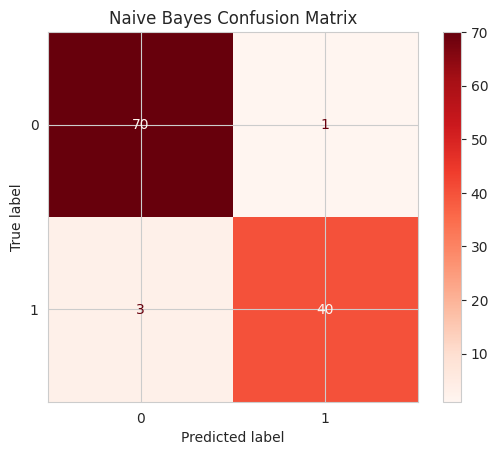

In [159]:
cm = confusion_matrix(y_test, y_pred_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Reds')
plt.title("Naive Bayes Confusion Matrix")
plt.show()

In [160]:
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.9649122807017544


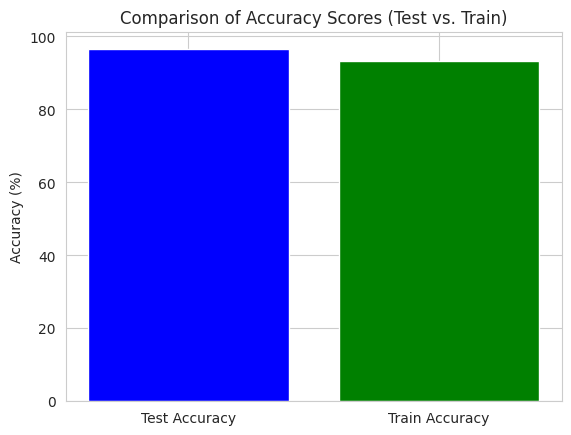

In [161]:
accuracy_test = accuracy_score(y_test, y_pred_nb) * 100
accuracy_train = accuracy_score(y_train, y_pred_nb_train) * 100

# Labels for the bars
labels = ['Test Accuracy', 'Train Accuracy']
accuracies = [accuracy_test, accuracy_train]

# Create a bar plot
plt.bar(labels, accuracies, color=['blue', 'green'])

# Adding labels and title
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Accuracy Scores (Test vs. Train)')

# Display the plot
plt.show()


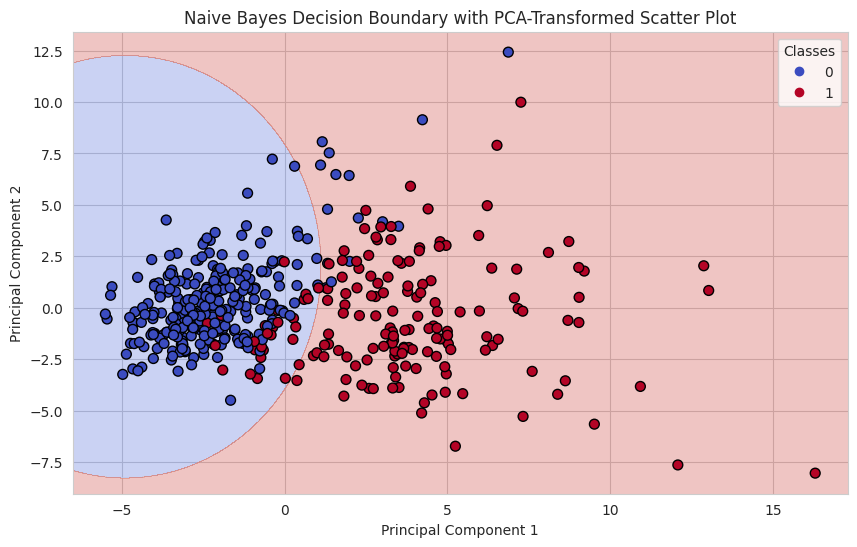

In [162]:
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(x_train_scaled)
X_test_2d = pca.transform(x_test_scaled)

# Train the Naive Bayes model on the two principal components
nb_2d = GaussianNB()
nb_2d.fit(X_train_2d, y_train)

# Set up the mesh grid for the decision boundary
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict for each point in the mesh grid
Z = nb_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and regions
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

# Plot the training data points
scatter = plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, s=50, cmap='coolwarm', edgecolor='k', label="Train Data")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Naive Bayes Decision Boundary with PCA-Transformed Scatter Plot')

# Add legend
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()


In [163]:
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_classifier.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [164]:
y_pred_knn_train = knn_classifier.predict(x_train_scaled)

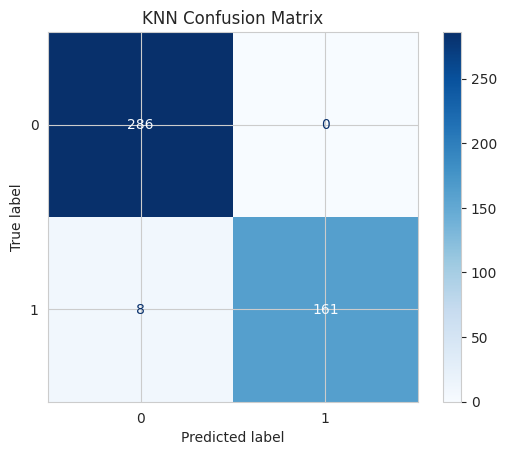

In [165]:
cm = confusion_matrix(y_train, y_pred_knn_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.show()

In [166]:
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
print("KNN Train Accuracy:", accuracy_knn_train)

KNN Train Accuracy: 0.9824175824175824


In [167]:
y_pred_knn = knn_classifier.predict(x_test_scaled)

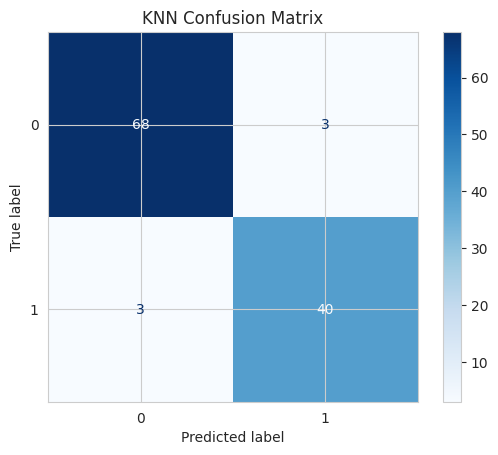

In [168]:
cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.show()

In [169]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)

KNN Accuracy: 0.9473684210526315


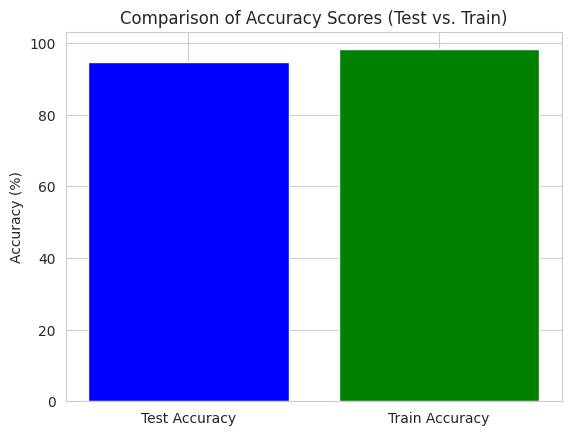

In [170]:
labels = ['Test Accuracy', 'Train Accuracy']
accuracies = [accuracy_knn*100, accuracy_knn_train*100]

# Create a bar plot
plt.bar(labels, accuracies, color=['blue', 'green'])

# Adding labels and title
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Accuracy Scores (Test vs. Train)')

# Display the plot
plt.show()


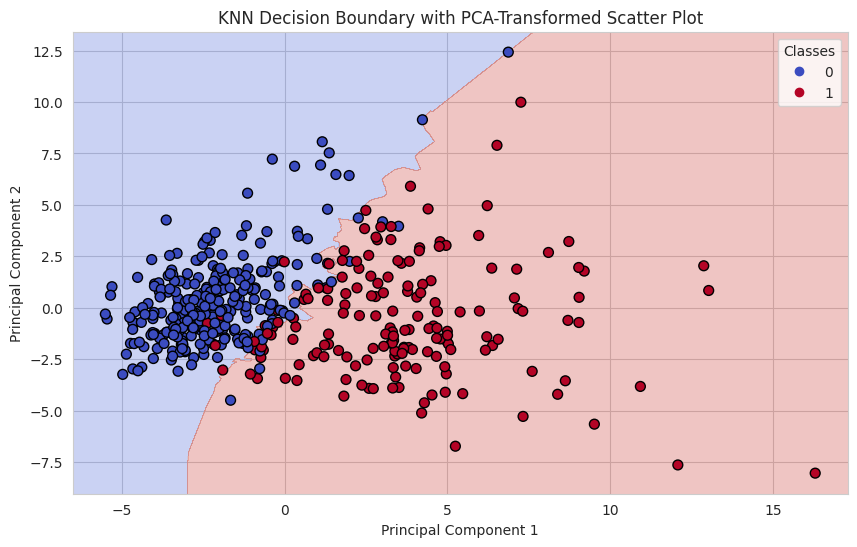

In [171]:
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(x_train_scaled)
X_test_2d = pca.transform(x_test_scaled)

# Train the KNN model on the two principal components
knn_2d = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_2d.fit(X_train_2d, y_train)

# Set up the mesh grid for the decision boundary
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict for each point in the mesh grid
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and regions
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

# Plot the training data points
scatter = plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, s=50, cmap='coolwarm', edgecolor='k', label="Train Data")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KNN Decision Boundary with PCA-Transformed Scatter Plot')

# Add legend
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()


In [172]:
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train_scaled, y_train)

LogisticRegression()

In [175]:
y_pred_logistic_train = logistic_regression.predict(x_train_scaled)

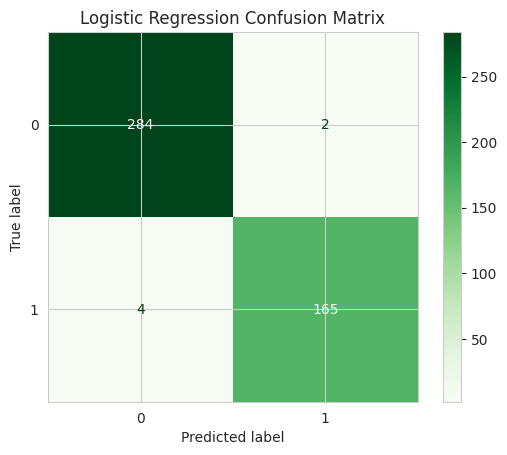

In [176]:
cm = confusion_matrix(y_train, y_pred_logistic_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Greens')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

In [178]:
accuracy_logistic_train = accuracy_score(y_train, y_pred_logistic_train)
print("Logistic Regression Accuracy:", accuracy_logistic_train)

Logistic Regression Accuracy: 0.9868131868131869


In [179]:
y_pred_logistic = logistic_regression.predict(x_test_scaled)

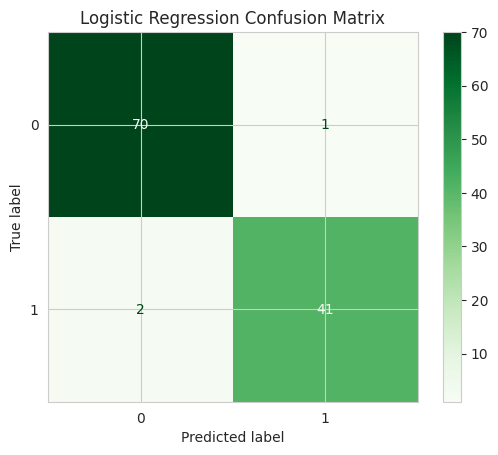

In [180]:
cm = confusion_matrix(y_test, y_pred_logistic)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Greens')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

In [181]:
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Accuracy:", accuracy_logistic)

Logistic Regression Accuracy: 0.9736842105263158


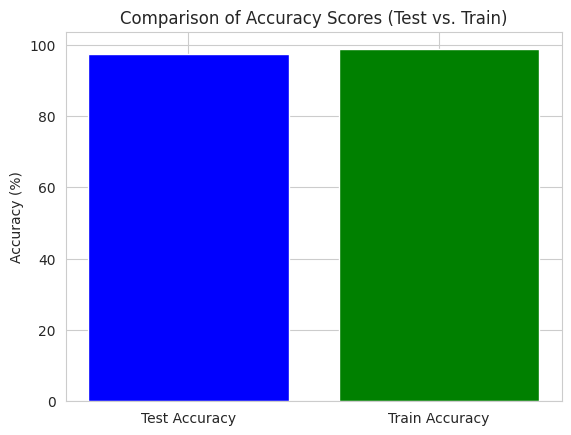

In [182]:
labels = ['Test Accuracy', 'Train Accuracy']
accuracies = [accuracy_logistic*100, accuracy_logistic_train*100]

# Create a bar plot
plt.bar(labels, accuracies, color=['blue', 'green'])

# Adding labels and title
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Accuracy Scores (Test vs. Train)')

# Display the plot
plt.show()


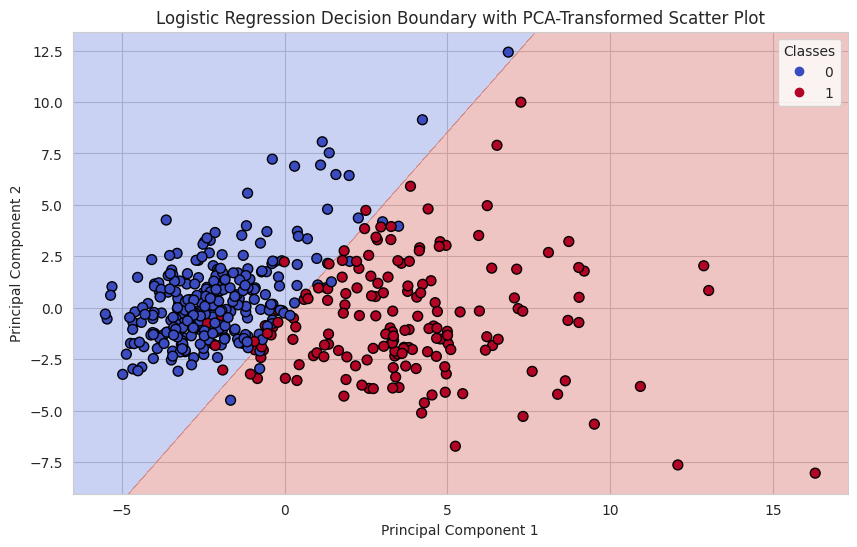

In [183]:
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(x_train_scaled)
X_test_2d = pca.transform(x_test_scaled)

# Train the Logistic Regression model on the two principal components
log_reg_2d = LogisticRegression()
log_reg_2d.fit(X_train_2d, y_train)

# Set up the mesh grid for the decision boundary
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict for each point in the mesh grid
Z = log_reg_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and regions
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

# Plot the training data points
scatter = plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, s=50, cmap='coolwarm', edgecolor='k', label="Train Data")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Logistic Regression Decision Boundary with PCA-Transformed Scatter Plot')

# Add legend
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()


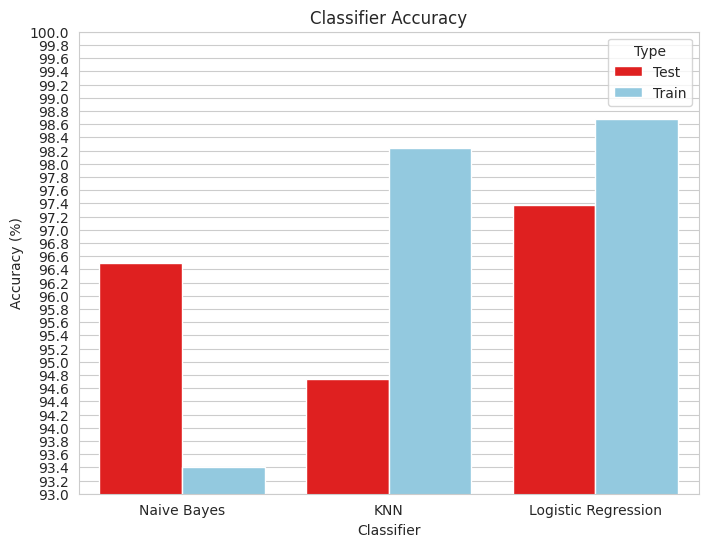

In [201]:
compare = {
    'Type': ['Test', 'Train', 'Test', 'Train', 'Test', 'Train'],
    'Classification': ['Naive Bayes', 'Naive Bayes', 'KNN', 'KNN', 'Logistic Regression', 'Logistic Regression'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_nb) * 100,
        accuracy_score(y_train, y_pred_nb_train) * 100,
        accuracy_knn * 100,
        accuracy_knn_train * 100,
        accuracy_logistic * 100,
        accuracy_logistic_train * 100
    ]
}

# Convert data to a DataFrame
df = pd.DataFrame(compare)

# Set the plot style
sns.set_style("whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(
    data=df,
    x='Classification',
    y='Accuracy',
    hue='Type',
    palette={'Test': 'red', 'Train': 'skyblue'}
)

# Set a narrow y-axis range to zoom in on close values
plt.ylim(93, 100)
plt.yticks(np.arange(93, 100.1, 0.2))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.1f}'))
# Add titles and labels
plt.title('Classifier Accuracy')
plt.xlabel('Classifier')
plt.ylabel('Accuracy (%)')

# Display the legend and show the plot
plt.legend(title='Type')
plt.show()
